In [152]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library
from statsmodels.tsa.arima_model import ARIMA

In [153]:
NRE_world = pd.read_excel('Total_Energy_Consumption_1965-2018.xlsx')

In [154]:
NRE_world = NRE_world.set_index('Total Energy')

In [155]:
NRE_world.head()

,index,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Contents.1
Total Energy,,,,,,,,,,,,,,,,,,,,,
Canada,3,115.910849,122.991657,129.026541,137.695457,145.303023,155.587992,159.794037,170.698240,181.241163,...,341.813863,339.043046,338.223484,343.696739,344.424157,0.002116,0.006524,0.024841,NaN,NaN
Mexico,4,24.972964,26.432788,26.922222,29.291127,32.196346,34.320386,36.094722,39.916724,43.065295,...,184.141764,183.970404,186.358373,189.300608,186.913820,-0.012608,0.012453,0.013481,NaN,NaN
US,5,1249.642424,1320.037950,1365.733676,1448.932114,1526.191928,1577.850993,1610.270681,1692.888180,1762.245098,...,2232.931428,2213.209941,2212.662102,2222.480694,2300.640296,0.035168,-0.004035,0.165933,NaN,NaN
Argentina,8,26.914442,27.809713,28.635373,29.623572,30.644712,28.937326,30.747979,31.299226,32.626256,...,84.127455,86.098900,85.917292,86.103674,85.052439,-0.012209,0.016172,0.006134,NaN,NaN
Brazil,9,22.486225,24.529219,25.404553,29.122828,31.813745,37.369778,40.871057,47.072428,56.155980,...,299.386207,295.949648,289.439294,293.888754,297.595143,0.012612,0.025151,0.021464,NaN,NaN


In [98]:
NRE_world.loc['India'][29:-5]

1993    222.645002
1994    234.439233
1995    252.180017
1996    262.524797
1997    277.143608
1998    293.718679
1999    301.684249
2000    317.536857
2001    319.346376
2002    334.305749
2003    347.329780
2004    367.767656
2005    395.119424
2006    415.437576
2007    451.893499
2008    477.864921
2009    514.281940
2010    539.152553
2011    571.373058
2012    601.043621
2013    624.522137
2014    667.518630
2015    689.777879
2016    719.252335
2017    750.087830
2018    809.153006
Name: India, dtype: float64

In [99]:
NRE_India = list(NRE_world.loc['India'][29:-6])

In [100]:
pop_growth = pd.read_excel("population_growth_forecast_1960-2030_India.xlsx")
pop_growth = pop_growth.set_index('Year')

In [101]:
India_energy = pd.read_excel("cent_elec_1993-2017.xlsx")
India_energy = India_energy.set_index('Year')

In [102]:
# input is year,populatiion, output is cent_access
X1 = pd.DataFrame(list(range(1993,2018)), columns = ['Year'])
X1['Population'] = list(India_energy['Population'])
Y1 = NRE_India

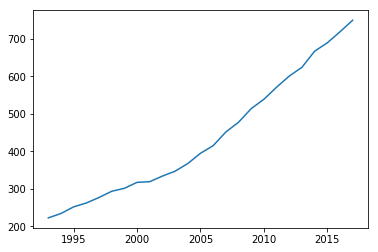

In [112]:
plt.plot(X1['Year'], Y1)

In [105]:
X1_train = X1[:20]
X1_test = X1[20:]
Y1_train = Y1[:20]
Y1_test = Y1[20:]

In [132]:
from sklearn.linear_model import Ridge
from sklearn import metrics

elec_pred = Ridge(alpha = 0.21)
elec_pred.fit(X1_train,Y1_train)

C:\Users\pooji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.648920e-18
  overwrite_a=True).T


Ridge(alpha=0.21, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [133]:
y1_pred = elec_pred.predict(X1_test)
print("R^2:", metrics.r2_score(y1_pred, Y1_test))

R^2: 0.9495664114150704


In [143]:
forcast_X1 = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = list(range(24,38)))
forcast_X1['Population'] = list(pop_growth['pop_pred'][57:])

In [144]:
y2_pred = elec_pred.predict(forcast_X1)

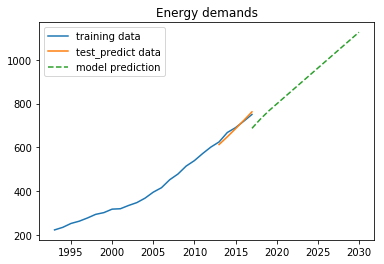

In [145]:
plt.plot(X1['Year'], Y1, label='training data')
plt.plot(X1_test['Year'], y1_pred, label='test_predict data')
plt.plot(forcast_X1['Year'], y2_pred, '--', label='model prediction')
plt.legend()
plt.title('Energy demands')
plt.show()

In [146]:
NRE_demand = NRE_India
for i in range(1,len(y2_pred)):
    NRE_demand.append(y2_pred[i])

In [147]:
NRE_India_pred = pd.DataFrame(NRE_demand, columns= ['NRE_pred'])

In [149]:
NRE_India_pred['Year'] = list(range(1993,2031))

In [150]:
NRE_India_pred= NRE_India_pred.set_index('Year')

In [151]:
NRE_India_pred.to_excel('NRE_India_Forecast.xlsx')